In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

**Data Loading**

In [3]:

file_path = '/content/drive/MyDrive/LSMS - Research Project/Stress Management/SaYoPillow.csv'
df = pd.read_csv(file_path)

df.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


**Data Preprocessing**

In [4]:
# Check for null values in each column
null_values = df.isnull().sum()
print(null_values)


sr      0
rr      0
t       0
lm      0
bo      0
rem     0
sr.1    0
hr      0
sl      0
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      630 non-null    float64
 1   rr      630 non-null    float64
 2   t       630 non-null    float64
 3   lm      630 non-null    float64
 4   bo      630 non-null    float64
 5   rem     630 non-null    float64
 6   sr.1    630 non-null    float64
 7   hr      630 non-null    float64
 8   sl      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


**Training Comparison**

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import train_test_split

# Splitting features and target
X = df.drop(columns=['sl'])
y = df['sl']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Classifier": SVC(probability=True, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Storing results
results = []

# Training and evaluating each model
for name, model in models.items():
    # Training the model
    model.fit(X_train, y_train)

    # Making predictions
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

    # Calculating accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculating log loss if probabilities are available
    loss = log_loss(y_test, y_pred_prob) if y_pred_prob is not None else None

    # Storing results
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Log Loss": loss
    })

# Displaying the results
for result in results:
    print(f"Model: {result['Model']}")
    print(f"  Accuracy: {result['Accuracy']}")
    print(f"  Log Loss: {result['Log Loss']}")
    print("-" * 30)


Model: Logistic Regression
  Accuracy: 1.0
  Log Loss: 0.0049369883570038586
------------------------------
Model: Decision Tree
  Accuracy: 0.9761904761904762
  Log Loss: 0.8581822235504085
------------------------------
Model: Random Forest
  Accuracy: 0.9841269841269841
  Log Loss: 0.02400937136473849
------------------------------
Model: Support Vector Classifier
  Accuracy: 0.9841269841269841
  Log Loss: 0.040374295721669465
------------------------------
Model: Gradient Boosting
  Accuracy: 0.9761904761904762
  Log Loss: 0.2207674954666326
------------------------------


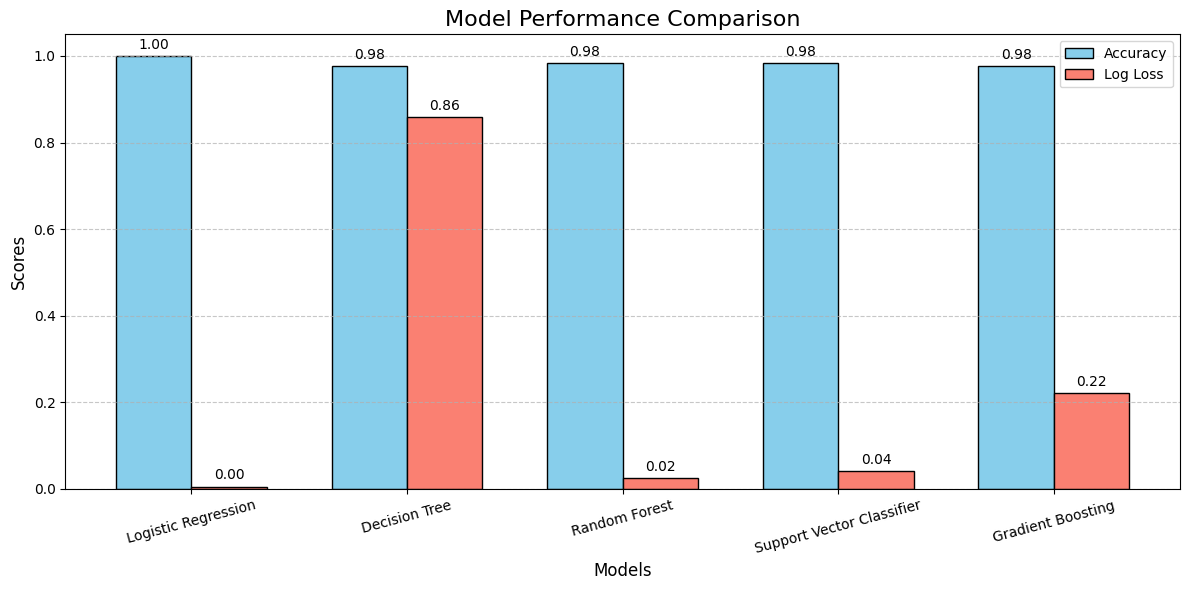

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Extract data for the chart
models = [result['Model'] for result in results]
accuracies = [result['Accuracy'] for result in results]
log_losses = [result['Log Loss'] if result['Log Loss'] is not None else 0 for result in results]

# Define the bar width and x-axis positions
bar_width = 0.35
x = np.arange(len(models))

# Plotting the grouped bar chart
plt.figure(figsize=(12, 6))
bars1 = plt.bar(x - bar_width / 2, accuracies, bar_width, label='Accuracy', color='skyblue', edgecolor='black')
bars2 = plt.bar(x + bar_width / 2, log_losses, bar_width, label='Log Loss', color='salmon', edgecolor='black')

# Adding annotations
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f"{bar.get_height():.2f}", ha='center', va='bottom', fontsize=10)
for bar in bars2:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f"{bar.get_height():.2f}", ha='center', va='bottom', fontsize=10)

# Adding labels, title, and legend
plt.title('Model Performance Comparison', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.xticks(x, models, rotation=15, fontsize=10)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Logistic Regression (Highest Accuracy)**

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
import matplotlib.pyplot as plt

# Splitting features and target
X = df.drop(columns=['sl'])  # Features
y = df['sl']                 # Target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the logistic regression model
log_reg = LogisticRegression(max_iter=500, random_state=42)
log_reg.fit(X_train, y_train)

# Making predictions
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)

# Calculating accuracy and log loss
accuracy = accuracy_score(y_test, y_pred)
loss = log_loss(y_test, y_pred_prob)

# Displaying results
print(f"Accuracy: {accuracy}")
print(f"Log Loss: {loss}")




Accuracy: 1.0
Log Loss: 0.0049369883570038586


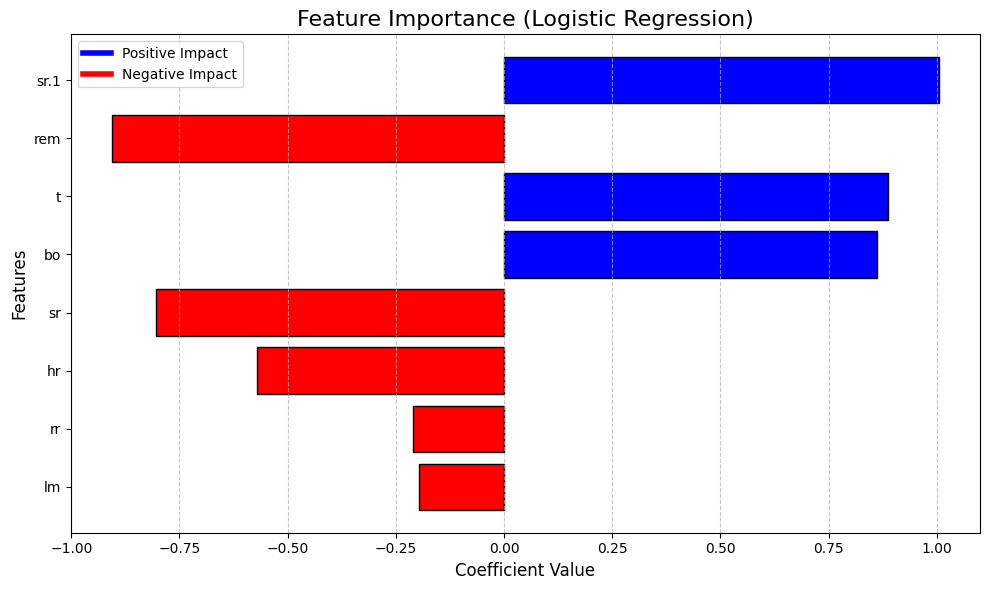

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Retrieve the coefficients from the trained logistic regression model
coefficients = log_reg.coef_[0]  # Coefficients for each feature (binary classification)
feature_names = X.columns        # Feature names

# Combine feature names and coefficients into a sorted list
feature_importance = sorted(zip(feature_names, coefficients), key=lambda x: abs(x[1]), reverse=True)

# Separate feature names and coefficients for plotting
sorted_features = [f[0] for f in feature_importance]
sorted_coefficients = [f[1] for f in feature_importance]

# Create a color scheme: positive (blue), negative (red)
colors = ['blue' if coef > 0 else 'red' for coef in sorted_coefficients]

# Plotting the feature importance with color coding
plt.figure(figsize=(10, 6))
bars = plt.barh(sorted_features, sorted_coefficients, color=colors, edgecolor='black')

# Add labels and grid
plt.title('Feature Importance (Logistic Regression)', fontsize=16)
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add legend for colors
blue_patch = plt.Line2D([0], [0], color='blue', lw=4, label='Positive Impact')
red_patch = plt.Line2D([0], [0], color='red', lw=4, label='Negative Impact')
plt.legend(handles=[blue_patch, red_patch])

# Adjust layout and invert y-axis for better readability
plt.tight_layout()
plt.gca().invert_yaxis()

# Display the chart
plt.show()


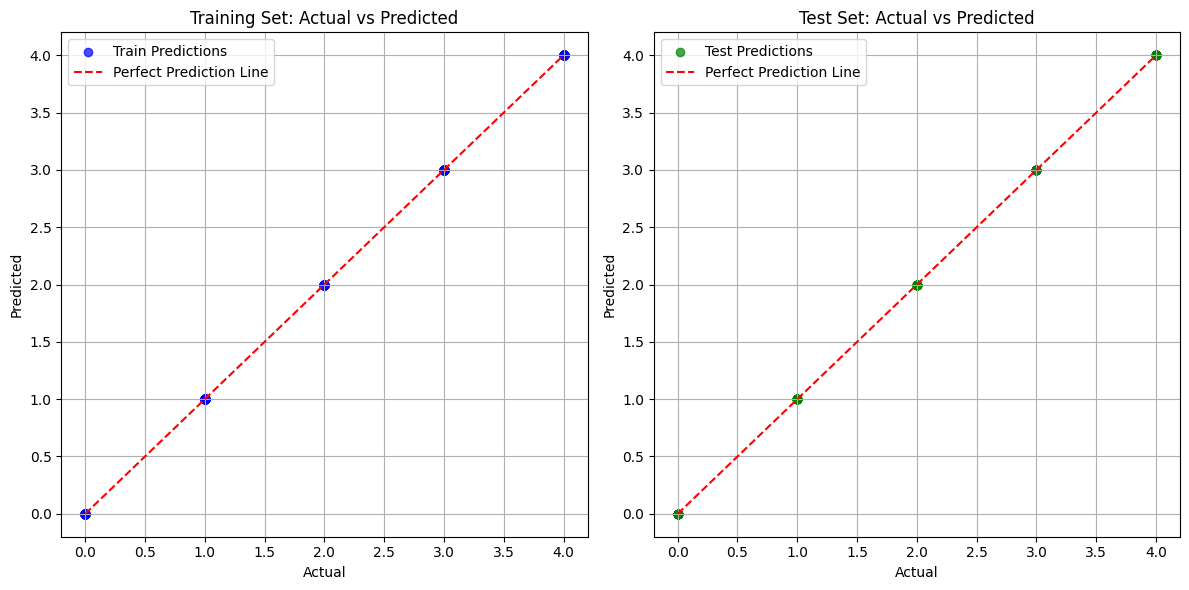

In [10]:
import numpy as np

# Predictions for training and test sets
y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)

# Plotting actual vs predicted for both training and test sets
plt.figure(figsize=(12, 6))

# Training set plot
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, alpha=0.7, color='blue', label='Train Predictions')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r--', label='Perfect Prediction Line')
plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid(True)

# Test set plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.7, color='green', label='Test Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Perfect Prediction Line')
plt.title('Test Set: Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid(True)

# Displaying the plot
plt.tight_layout()
plt.show()


In [11]:
import joblib

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the logistic regression model
log_reg = LogisticRegression(max_iter=500, random_state=42)
log_reg.fit(X_train, y_train)

# Exporting the trained logistic regression model
joblib.dump(log_reg, 'logistic_regression_stress_model.joblib')
print("Model exported as 'logistic_regression_model.joblib'.")

# Making predictions
y_pred = log_reg.predict(X_test)
y_pred_prob = log_reg.predict_proba(X_test)

# Calculating accuracy and log loss
accuracy = accuracy_score(y_test, y_pred)
loss = log_loss(y_test, y_pred_prob)

# Displaying results
print(f"Accuracy: {accuracy}")
print(f"Log Loss: {loss}")



Model exported as 'logistic_regression_model.joblib'.
Accuracy: 1.0
Log Loss: 0.0049369883570038586


**Testing**

In [12]:
import numpy as np

def predict_stress_level(model, snoring_range, respiration_rate, body_temperature,
                         limb_movement_rate, blood_oxygen_level, eye_movement,
                         hours_of_sleep, heart_rate):
    """
    Predict the stress level (0-4) based on user parameters.

    Parameters:
    - model: Trained LogisticRegression model
    - snoring_range: Snoring range of the user (float)
    - respiration_rate: Respiration rate of the user (float)
    - body_temperature: Body temperature of the user (float)
    - limb_movement_rate: Limb movement rate of the user (float)
    - blood_oxygen_level: Blood oxygen levels of the user (float)
    - eye_movement: Eye movement rate of the user (float)
    - hours_of_sleep: Number of hours of sleep (float)
    - heart_rate: Heart rate of the user (float)

    Returns:
    - Predicted stress level (0-4) (int)
    """
    # Create an array of input features
    input_features = np.array([[snoring_range, respiration_rate, body_temperature,
                                limb_movement_rate, blood_oxygen_level, eye_movement,
                                hours_of_sleep, heart_rate]])

    # Predict the class (stress level) using the model
    predicted_stress_level = model.predict(input_features)[0]

    # Return the predicted stress level
    return predicted_stress_level

# Example usage
# Assuming log_reg is the trained LogisticRegression model
example_prediction = predict_stress_level(
    log_reg,
    snoring_range=70.0,
    respiration_rate=15.0,
    body_temperature=98.6,
    limb_movement_rate=40.0,
    blood_oxygen_level=95.0,
    eye_movement=20.0,
    hours_of_sleep=5.0,
    heart_rate=72.0
)
print(f"Predicted Stress Level: {example_prediction}")


Predicted Stress Level: 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
